In [59]:

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout
import pandas as pd
import os


from keras.preprocessing import sequence
np.random.seed(7)

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14505013037920066371
xla_global_id: -1
]


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

X = []
y = []
base_path = '/content/drive/MyDrive/featureset'
source_path = base_path

for child in os.listdir(source_path):
    sub_path = os.path.join(source_path, child)
    if os.path.isdir(sub_path):
        print(sub_path)
        for data_file in os.listdir(sub_path):
            file_path = os.path.join(sub_path, data_file)
            print(file_path)
            data = pd.read_csv(file_path)
            print(data)
            data = data.to_numpy()
            print(data)
            X.append(data[:,:])
            y.append(child)
            break



/content/drive/MyDrive/featureset/karunam_csv
/content/drive/MyDrive/featureset/karunam_csv/K1.csv
    Eye Aspect Ratio  Eye Distance  Eyebrow Distance  Mouth Aspect Ratio  \
0                1.0   3764.336494       4927.847098            0.287775   
1                1.0   4453.457801       5938.598883            0.754761   
2                1.0   2122.653470       2703.755814            0.404968   
3                1.0   2910.022944       3774.746089            0.136595   
4                1.0   3550.927173       4712.952017            1.104090   
5                1.0   4958.710193       6615.623843            1.478709   
6                1.0   3960.607652       5327.389695            1.230891   
7                1.0   2276.292014       2906.240202            0.081569   
8                1.0   7722.256450      10604.995710            0.909583   
9                1.0   2424.431565       3198.127726            0.008578   
10               1.0   2924.497237       3881.239416            0

In [61]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y = lb.fit_transform(y)

In [62]:
print(np.shape(X))
print(np.shape(y))

(9,)
(9, 9)


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [63]:
max_pad_length = 15
X_tr = sequence.pad_sequences(X, maxlen=max_pad_length,padding='post')

In [64]:
print(np.shape(X_tr))
print(np.shape(y))

(9, 15, 8)
(9, 9)


In [83]:

modelClass1 = Sequential()
modelClass1.add(LSTM(200, return_sequences=True, input_shape=(15, 8)))
modelClass1.add(Dropout(0.2))
modelClass1.add(LSTM(200, activation='relu'))
modelClass1.add(Dropout(0.1))
modelClass1.add(Dense(9, activation='softmax'))
modelClass1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  # Use categorical cross-entropy
print(modelClass1.summary())
modelClass1.fit(X_tr, y, epochs=60, batch_size=2)


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_56 (LSTM)              (None, 15, 200)           167200    
                                                                 
 dropout_50 (Dropout)        (None, 15, 200)           0         
                                                                 
 lstm_57 (LSTM)              (None, 200)               320800    
                                                                 
 dropout_51 (Dropout)        (None, 200)               0         
                                                                 
 dense_26 (Dense)            (None, 9)                 1809      
                                                                 
Total params: 489809 (1.87 MB)
Trainable params: 489809 (1.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/60
1

In [84]:
scores = modelClass.evaluate(X_tr, y, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 66.67%


In [48]:
predicted_probabilities = modelClass.predict(X_tr)
predicted_labels = lb.inverse_transform(predicted_probabilities)
print("Predicted Labels:")
print(predicted_labels)
from sklearn.metrics import accuracy_score
true_labels = lb.inverse_transform(y)
accuracy = accuracy_score(true_labels, predicted_labels)
for true_label, predicted_label in zip(true_labels, predicted_labels):
    print(f"True Label: {true_label}, Predicted Label: {predicted_label}")
print(f"Accuracy: {accuracy * 100:.2f}%")


1/1 [==============================] - 1s 566ms/step
Predicted Labels:
['karunam_csv' 'shantham_csv' 'raudram_csv' 'bhayanakam_csv' 'hasyam_csv'
 'sringaram_csv' 'raudram_csv' 'raudram_csv' 'sringaram_csv']
True Label: karunam_csv, Predicted Label: karunam_csv
True Label: shantham_csv, Predicted Label: shantham_csv
True Label: raudram_csv, Predicted Label: raudram_csv
True Label: bhayanakam_csv, Predicted Label: bhayanakam_csv
True Label: hasyam_csv, Predicted Label: hasyam_csv
True Label: sringaram_csv, Predicted Label: sringaram_csv
True Label: albhudam_csv, Predicted Label: raudram_csv
True Label: bheebatsam_csv, Predicted Label: raudram_csv
True Label: veeram_csv, Predicted Label: sringaram_csv
Accuracy: 66.67%


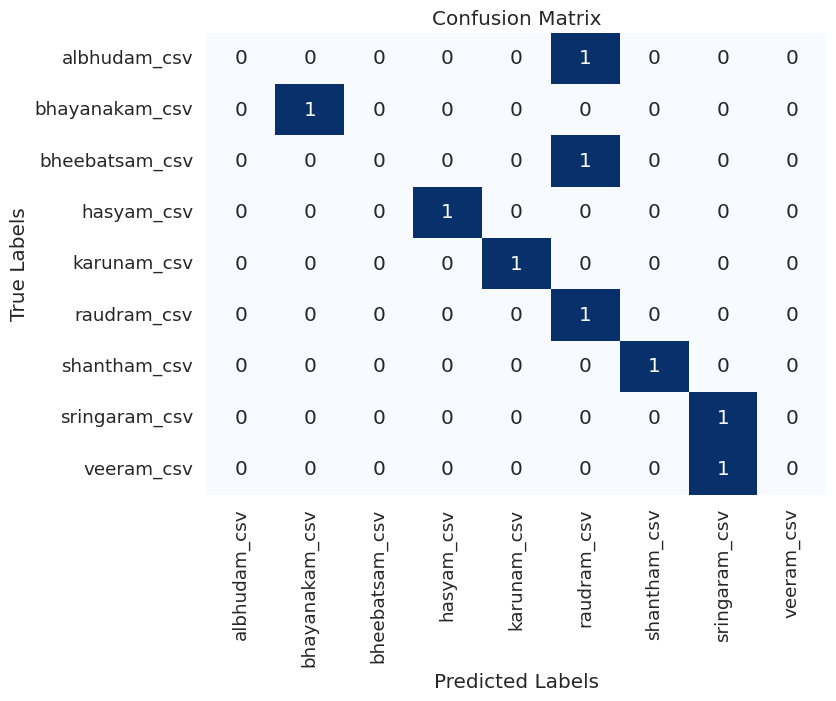

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)  # Use 'true_labels' instead of 'true_label'

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

# Calculate precision
precision = precision_score(true_labels, predicted_labels, average='weighted')

# Calculate recall
recall = recall_score(true_labels, predicted_labels, average='weighted')

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Generate a classification report with precision, recall, F1, and more
report = classification_report(true_labels, predicted_labels)

# Print the results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Classification Report:\n", report)


Precision: 0.54
Recall: 0.67
F1 Score: 0.57
Classification Report:
                 precision    recall  f1-score   support

  albhudam_csv       0.00      0.00      0.00         1
bhayanakam_csv       1.00      1.00      1.00         1
bheebatsam_csv       0.00      0.00      0.00         1
    hasyam_csv       1.00      1.00      1.00         1
   karunam_csv       1.00      1.00      1.00         1
   raudram_csv       0.33      1.00      0.50         1
  shantham_csv       1.00      1.00      1.00         1
 sringaram_csv       0.50      1.00      0.67         1
    veeram_csv       0.00      0.00      0.00         1

      accuracy                           0.67         9
     macro avg       0.54      0.67      0.57         9
  weighted avg       0.54      0.67      0.57         9



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13